## Approach to solve the problem:
Predicting a player’s rank using the information provided in the dataset:

1. Exploratory Data Analysis (EDA): <br>
Perform an initial exploration of the dataset to understand its structure, features, and relationships. Helps in gaining insights and identifying any data quality issues or missing values. Tasks to perform during EDA: <br>
a. Identify missing values. <br>
b. Generate descriptive statistics of the data. <br>
c. Visualize the distribution of target variable and features using plots (histograms, box plots, etc.) from libraries like matplotlib and seaborn. <br>


2. Data Preprocessing: <br>
a. Handle missing values: Depending on the extent of missing data, we can choose to drop rows or columns with missing values or impute them using techniques like mean, median, or mode. <br>
b. Encode categorical variables: If there are categorical variables in the dataset, encode them using techniques like one-hot encoding or label encoding, depending on the nature of the variables. <br>
c. Detect and handle outliers. <br> 
d. Split the data: Divide the dataset into training and testing sets. <br>


3. Feature Selection or Engineering: <br>
Based on the insights gained during EDA, we might need to perform feature selection or engineering to improve the model's performance. This can involve removing irrelevant or highly correlated features, creating new features, or transforming existing ones.


4. Model Training and Evaluation: <br>
a. Experiment with different machine learning algorithms for classification like logistic regression, decision trees, random forest, or support vector machines, since predicting rank is a classification problem. <br>
b. Train the model using the training data. <br>
c. Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score. Use the testing data for evaluation. <br>


5. Model Improvement and Tuning:
If the model's performance is not satisfactory, try different algorithms or tune hyperparameters to improve it using techniques like grid search or random search.


6. Model Deployment and Communication:
Once we have a satisfactory model, we can deploy it to make predictions on new data. Document our findings, methodology, and evaluation results in a clear and concise manner, suitable for non-technical stakeholders. Communicate the findings to stakeholders using visualizations and data story based explanations that are easily understandable.


## Hypothetical: 
If stakeholders want to collect more data, we can advise them based on our EDA and model results:

1. Identify the areas where the dataset is lacking or where more data could be beneficial. For example, if certain features have a high correlation with the target variable but are limited in the current dataset, suggest collecting more data for those features.
2. Assess if there are any class imbalances or biases in the data and suggest collecting more data to address these issues.
3. Analyze if certain subsets of the data are underrepresented and recommend collecting more data to balance the representation.
4. Consider any specific insights or patterns observed during the model building process and suggest collecting more data to validate or refine those findings.
5. By providing guidance on data collection based on our EDA and model results, we can help stakeholders improve the model's accuracy and robustness.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, zscore
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('data/starcraft_player_data.csv')
data.shape

(3395, 20)

## Exploratory Data Analysis

In [3]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## Impute missing values

In [5]:
# There are some question marks in the data. Literally!
data[data['Age']=='?']

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,?,?,?,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000
3349,10023,8,?,?,?,248.0118,0.014722,0.001752,7,0.000375,0.000110,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000


All the players with LeagueIndex=8 don't have Age, HrsPerWk and TotalHrs. It can be handled in the following ways:

1. Regression Imputation: <br>
a. Treat age as the target variable and use other relevant features in the dataset to predict the missing ages. <br>
b. Split the data into two sets: one with non-missing ages (training set) and the other with missing ages (test set). <br>
c. Train a regression model (e.g., linear regression, random forest regression) on the training set, using other features as predictors and age as the target variable. <br>
d. Use the trained model to predict the missing ages in the test set. <br>
e. Replace the missing values with the predicted ages. <br>
This approach assumes that there is a relationship between the missing age values and the other features in the dataset, allowing the model to make accurate predictions. <br>


2. K-Nearest Neighbors (KNN) Imputation: <br>
a. Identify the k nearest neighbors for each data point with a missing age based on the available features. <br>
b. Calculate the average age of the k nearest neighbors. <br>
c. Replace the missing values with the calculated average age. <br>
This approach assumes that similar individuals (based on other features) are likely to have similar ages. <br>


3. Mean or Median Imputation: <br>
a. Calculate the mean or median age of the available data (non-missing values). <br>
b. Replace the missing values with the calculated mean or median age. <br>
This approach assumes that the missing values are missing completely at random and that the mean or median age is a representative value for imputation.

For now, we will use mean or median imputation, but other imputation techniques might give better results.

In [9]:
# some of the columns have '?' instead of missing values
data.replace('?', np.nan, inplace=True)
data.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

Missing values in age, hrs per week and total hours cols - need to imputate them!

In [10]:
data['Age'].astype(float).describe()

count    3340.000000
mean       21.647904
std         4.206341
min        16.000000
25%        19.000000
50%        21.000000
75%        24.000000
max        44.000000
Name: Age, dtype: float64

In [11]:
# imputing the age column using mean value since age is normally distributed
data['Age'].fillna(data['Age'].astype(float).mean(), inplace=True)
data['Age'] = data['Age'].astype(float)

In [12]:
data['HoursPerWeek'].astype(float).describe()

count    3339.000000
mean       15.910752
std        11.962912
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       168.000000
Name: HoursPerWeek, dtype: float64

In [13]:
# imputing the hrs per week column using median since it has outliers, and median is less sensitive to outliers
data['HoursPerWeek'].fillna(data['HoursPerWeek'].median(), inplace=True)
data['HoursPerWeek'] = data['HoursPerWeek'].astype(int)

In [14]:
data['TotalHours'].astype(float).describe()

count       3338.000000
mean         960.421809
std        17318.133922
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

In [15]:
# imputing the total hrs column using median since it has some massive outliers
data['TotalHours'].fillna(data['TotalHours'].median(), inplace=True)
data['TotalHours'] = data['TotalHours'].astype(int)

In [16]:
# Identifying the unique number of values in the dataset
data.nunique()

GameID                  3395
LeagueIndex                8
Age                       29
HoursPerWeek              32
TotalHours               237
APM                     3374
SelectByHotkeys         3375
AssignToHotkeys         3361
UniqueHotkeys             11
MinimapAttacks          2471
MinimapRightClicks      3302
NumberOfPACs            3386
GapBetweenPACs          3358
ActionLatency           3367
ActionsInPAC            3223
TotalMapExplored          52
WorkersMade             3256
UniqueUnitsMade           12
ComplexUnitsMade        1110
ComplexAbilitiesUsed    1828
dtype: int64

In [17]:
# GameID is just an index column, so dropping it
data.drop(['GameID'], axis=1, inplace=True)

## Data Visualizations

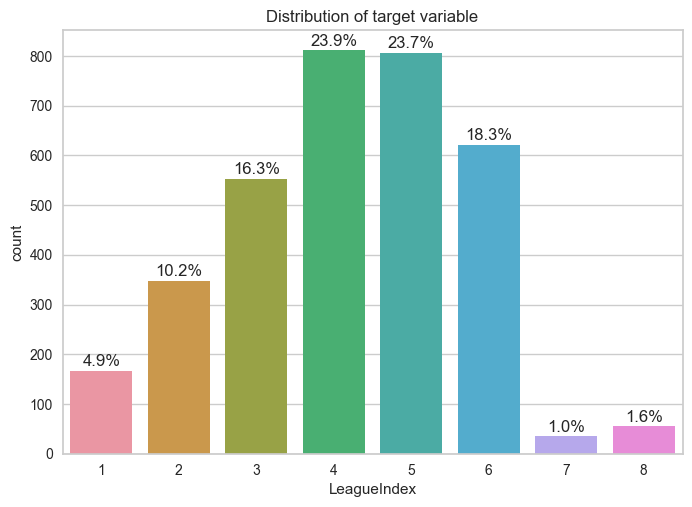

In [58]:
# distribution of the target variable to check if it is skewed or balanced
ax = sns.countplot(x='LeagueIndex', data=data)
for i, patch in enumerate(ax.patches):
    percentage = 100 * patch.get_height()/len(data)
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()+10
    ax.annotate('{:.1f}%'.format(percentage), (x, y), ha='center')
plt.title('Distribution of target variable')
plt.show()

Target variable is skewed. This is not good - the ideal distribution should be uniform. We will address this later when training the model using SMOTE for fix the skewness of the target variable.

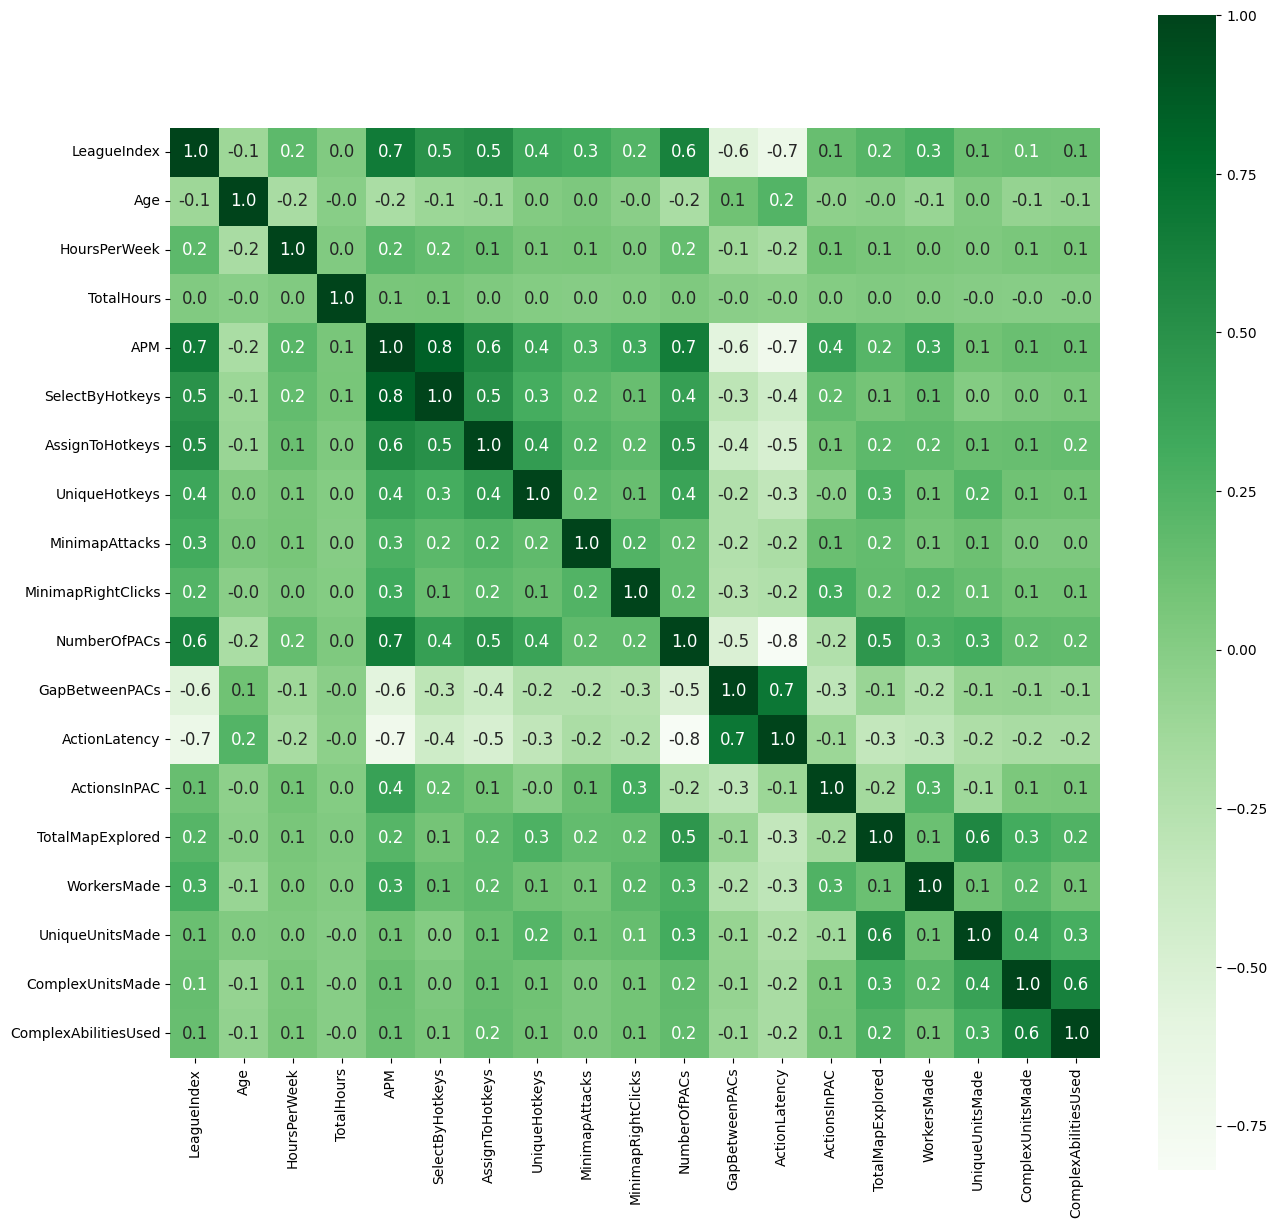

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Greens')
plt.show()

The heatmap of the correlation plot is a very helpful plot that provides a visual representation of the correlation between pairs of variables in a dataset, and allows us to identify relationships, dependencies, and patterns among the variables.

1. Correlation Strength: The heatmap color-codes the correlation coefficients, making it easy to identify the strength and direction of the relationships. High positive correlations are represented by brighter colors (e.g., dark green), indicating that the variables move together. Negative correlations are represented by darker colors (e.g., white), suggesting an inverse relationship.

2. Feature Selection: The heatmap helps in feature selection by identifying highly correlated variables. If two variables are strongly correlated (either positively or negatively), it indicates that they carry similar information. In such cases, we may choose to remove one of the variables to avoid multicollinearity and reduce redundancy in our analysis.

3. Multivariate Analysis: The heatmap allows for multivariate analysis by showing the correlation between all pairs of variables simultaneously. This helps in identifying clusters or groups of variables that are highly correlated with each other. Such groups can provide insights into underlying patterns or relationships within the data.

4. Missing Data and Imputation: The heatmap can reveal missing data patterns and help in deciding on an appropriate strategy for imputing missing values. If there are correlations between missing values in different variables, it may indicate a systematic pattern or relationship. This understanding can guide the imputation process or suggest the need for additional data collection.

5. Model Building: The heatmap can assist in model building by identifying variables that are strongly correlated with the target variable. Variables with high correlation can be considered as potential predictors in the model. Additionally, the heatmap can reveal any correlations between predictors, helping in understanding the potential impact of multicollinearity on the model's performance.

C:\Users\shrea\anaconda3\envs\ppi_pred\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


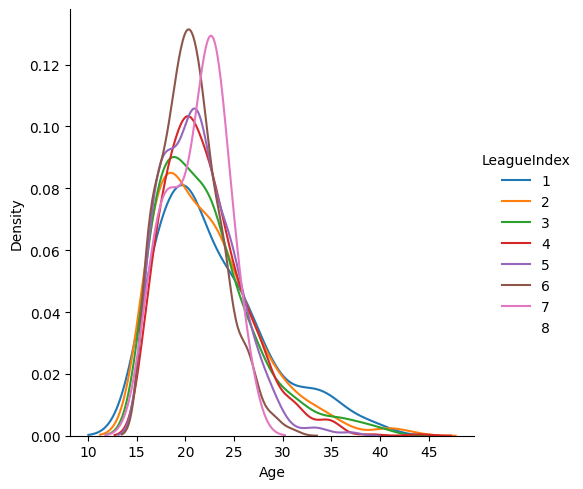

In [20]:
# Distribution density plot KDE (kernel density estimate) for age
sns.FacetGrid(data, hue="LeagueIndex", height=5).map(sns.kdeplot, "Age").add_legend()
plt.show()

Younger players between 15-27 are more likely to have a higer rank. After 30 years, the average skill level starts decreasing.

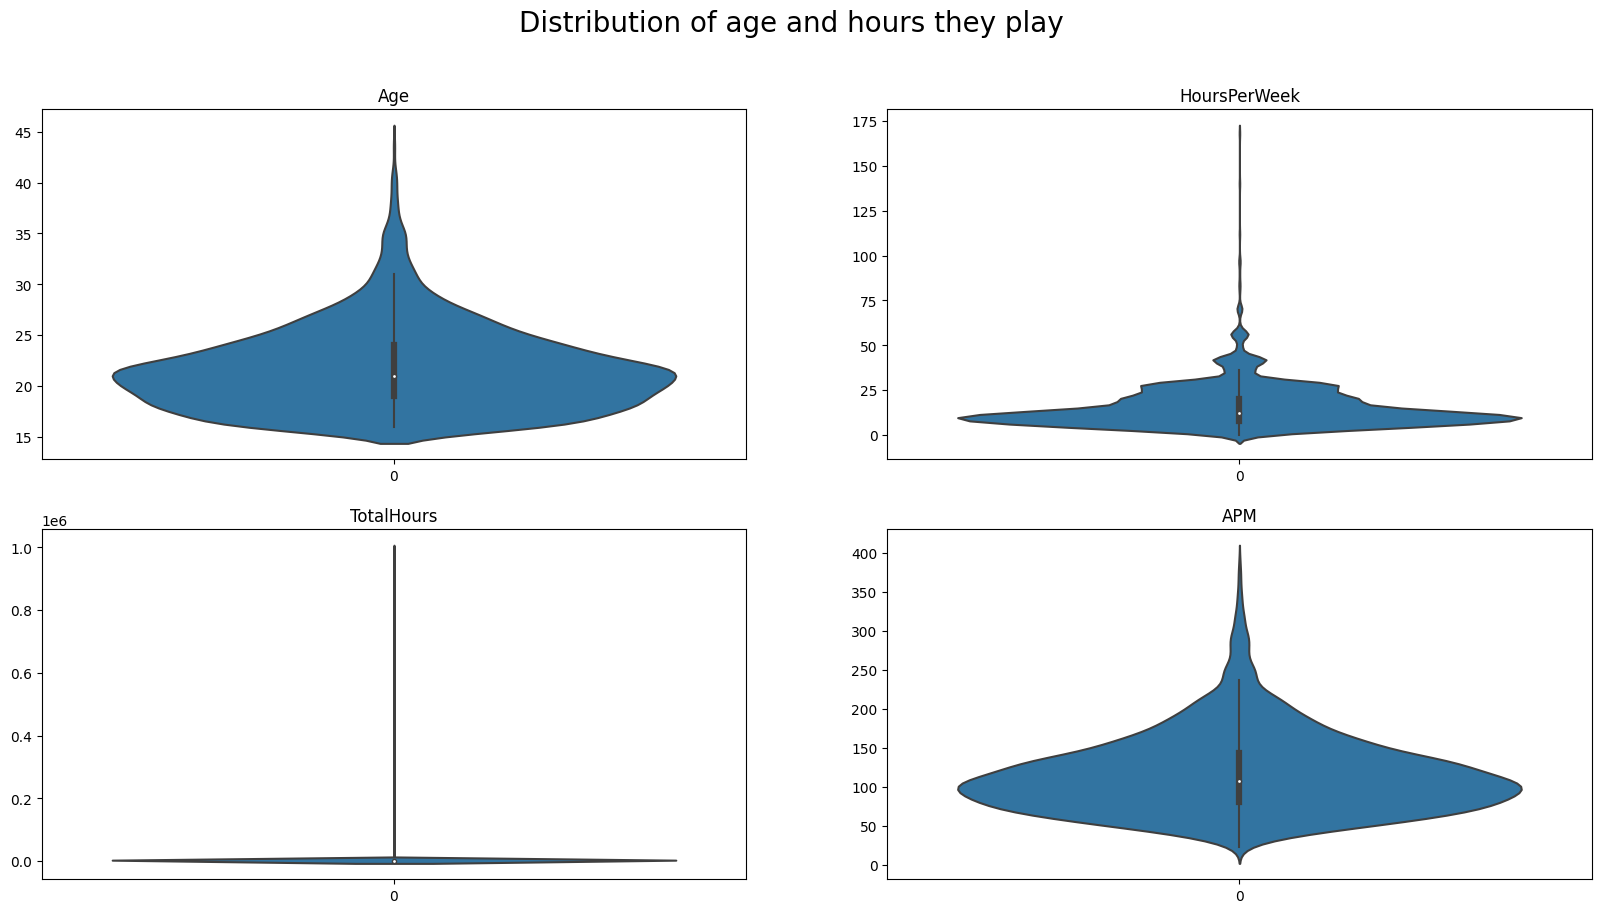

In [21]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.violinplot(data['Age'], ax = ax[0][0])
ax[0][0].set_title('Age')
sns.violinplot(data['HoursPerWeek'], ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.violinplot(data['TotalHours'], ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.violinplot(data['APM'], ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

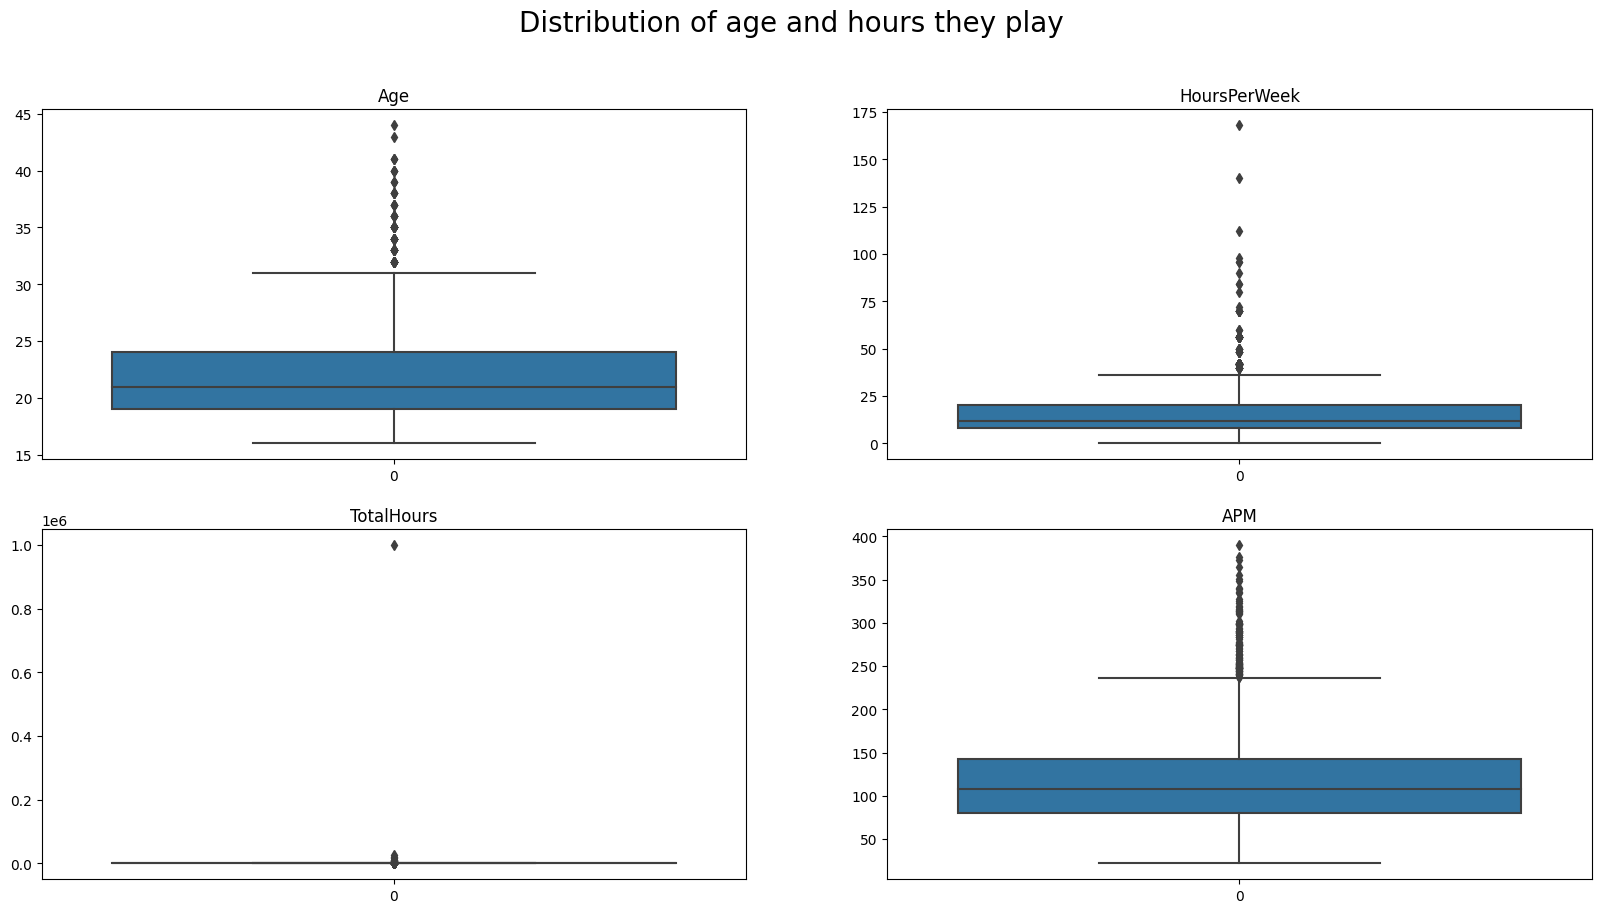

In [22]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.boxplot(data['Age'], ax = ax[0][0])
ax[0][0].set_title('Age')
sns.boxplot(data['HoursPerWeek'], ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.boxplot(data['TotalHours'], ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.boxplot(data['APM'], ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

In [23]:
data['TotalHours'].describe()

count       3395.000000
mean         952.691605
std        17172.196750
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

Age, HoursPerWeek and APM distributions have some outliers that can be seen in the above boxplots. However, the TotalHours has some extreme outliers that we need to address! We will do further outlier analysis for other features, and will address them later collectively to make our model robust to outliers.

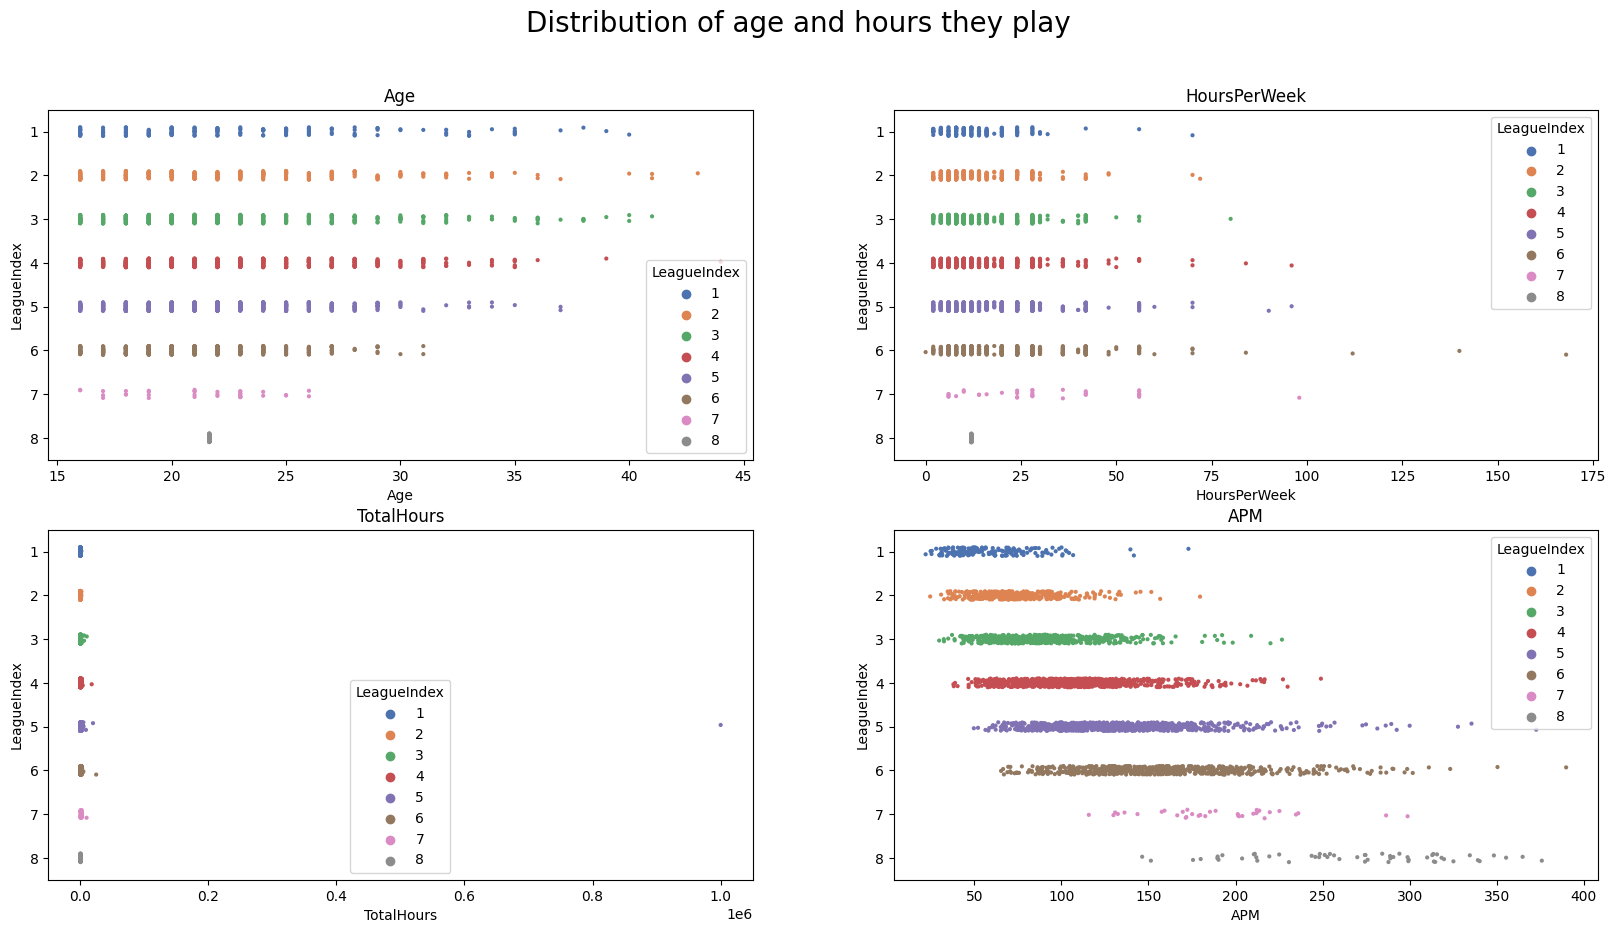

In [24]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.stripplot(data=data, x="Age", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[0][0])
ax[0][0].set_title('Age')
sns.stripplot(data=data, x="HoursPerWeek", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.stripplot(data=data, x="TotalHours", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.stripplot(data=data, x="APM", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=3, ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

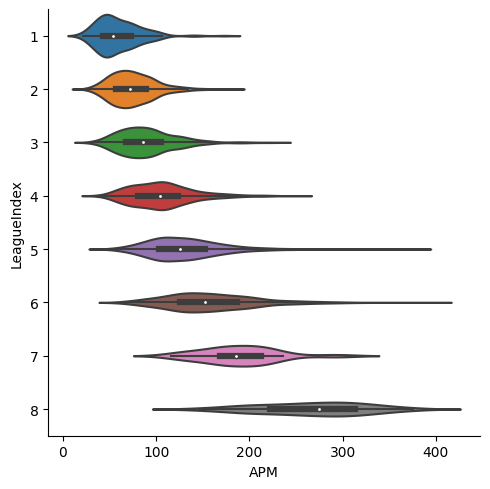

In [25]:
sns.catplot(data=data, x="APM", y="LeagueIndex", kind="violin", orient='h')
plt.show()

APM seems to be an important indicator to the LeagueIndex!

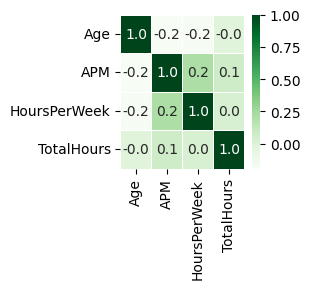

In [26]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['Age','APM','HoursPerWeek','TotalHours']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

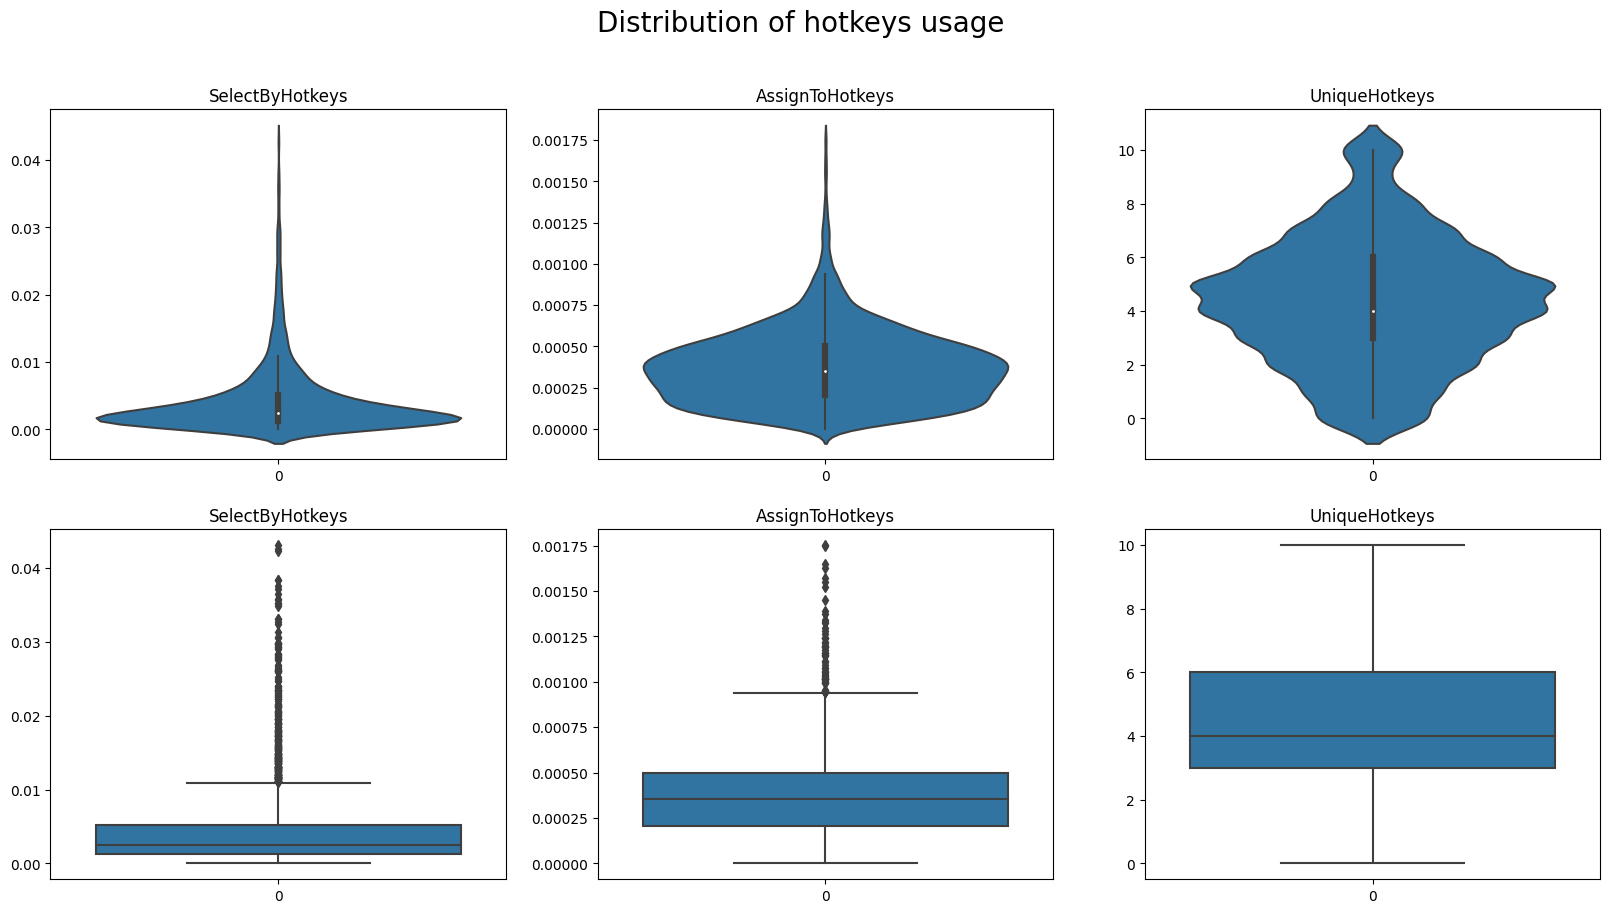

In [27]:
# distribution of hotkeys usage
fig,ax = plt.subplots(2,3, figsize=(20,10))
plt.suptitle("Distribution of hotkeys usage", fontsize=20)
sns.violinplot(data['SelectByHotkeys'], ax = ax[0][0])
ax[0][0].set_title('SelectByHotkeys')
sns.violinplot(data['AssignToHotkeys'], ax = ax[0][1])
ax[0][1].set_title('AssignToHotkeys')
sns.violinplot(data['UniqueHotkeys'], ax = ax[0][2])
ax[0][2].set_title('UniqueHotkeys')
sns.boxplot(data['SelectByHotkeys'], ax = ax[1][0])
ax[1][0].set_title('SelectByHotkeys')
sns.boxplot(data['AssignToHotkeys'], ax = ax[1][1])
ax[1][1].set_title('AssignToHotkeys')
sns.boxplot(data['UniqueHotkeys'], ax = ax[1][2])
ax[1][2].set_title('UniqueHotkeys')
plt.show()

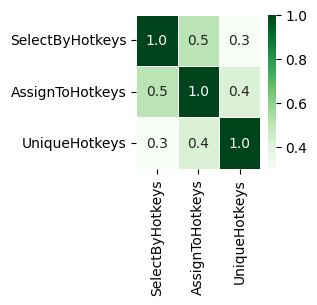

In [28]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['SelectByHotkeys','AssignToHotkeys','UniqueHotkeys']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

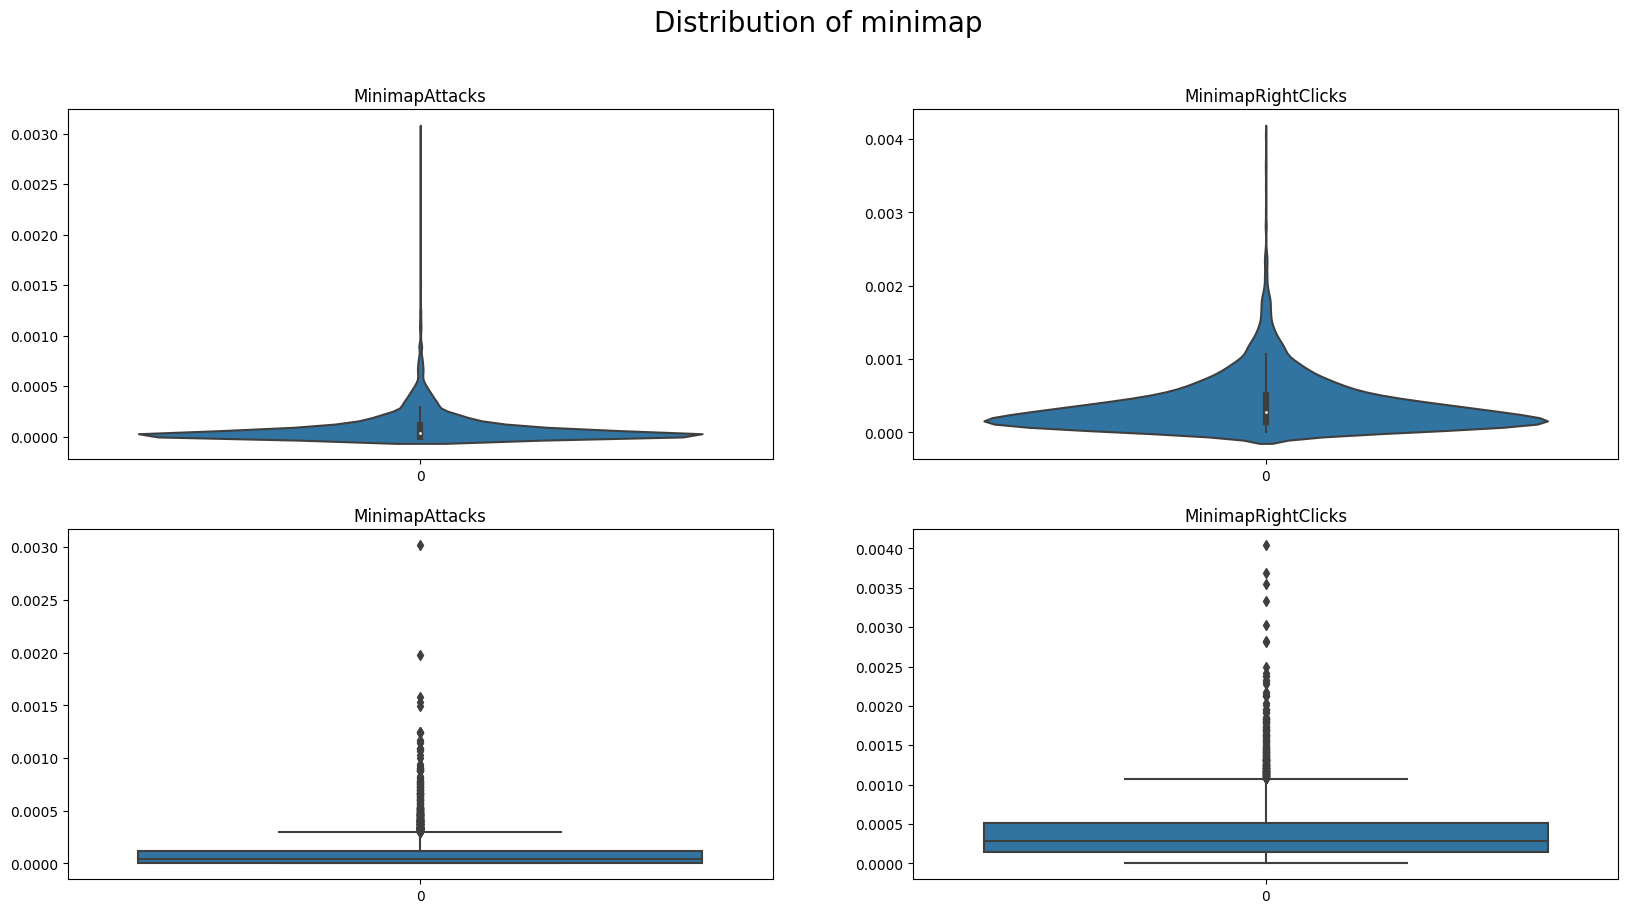

In [29]:
# distribution of minimap habits of the player
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of minimap", fontsize=20)
sns.violinplot(data['MinimapAttacks'], ax = ax[0][0])
ax[0][0].set_title('MinimapAttacks')
sns.violinplot(data['MinimapRightClicks'], ax = ax[0][1])
ax[0][1].set_title('MinimapRightClicks')
sns.boxplot(data['MinimapAttacks'], ax = ax[1][0])
ax[1][0].set_title('MinimapAttacks')
sns.boxplot(data['MinimapRightClicks'], ax = ax[1][1])
ax[1][1].set_title('MinimapRightClicks')
plt.show()

Distribution is a little skewed, so we might need to address it!

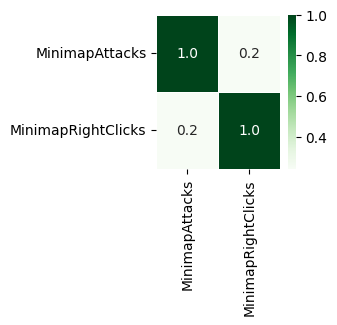

In [30]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['MinimapAttacks','MinimapRightClicks']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

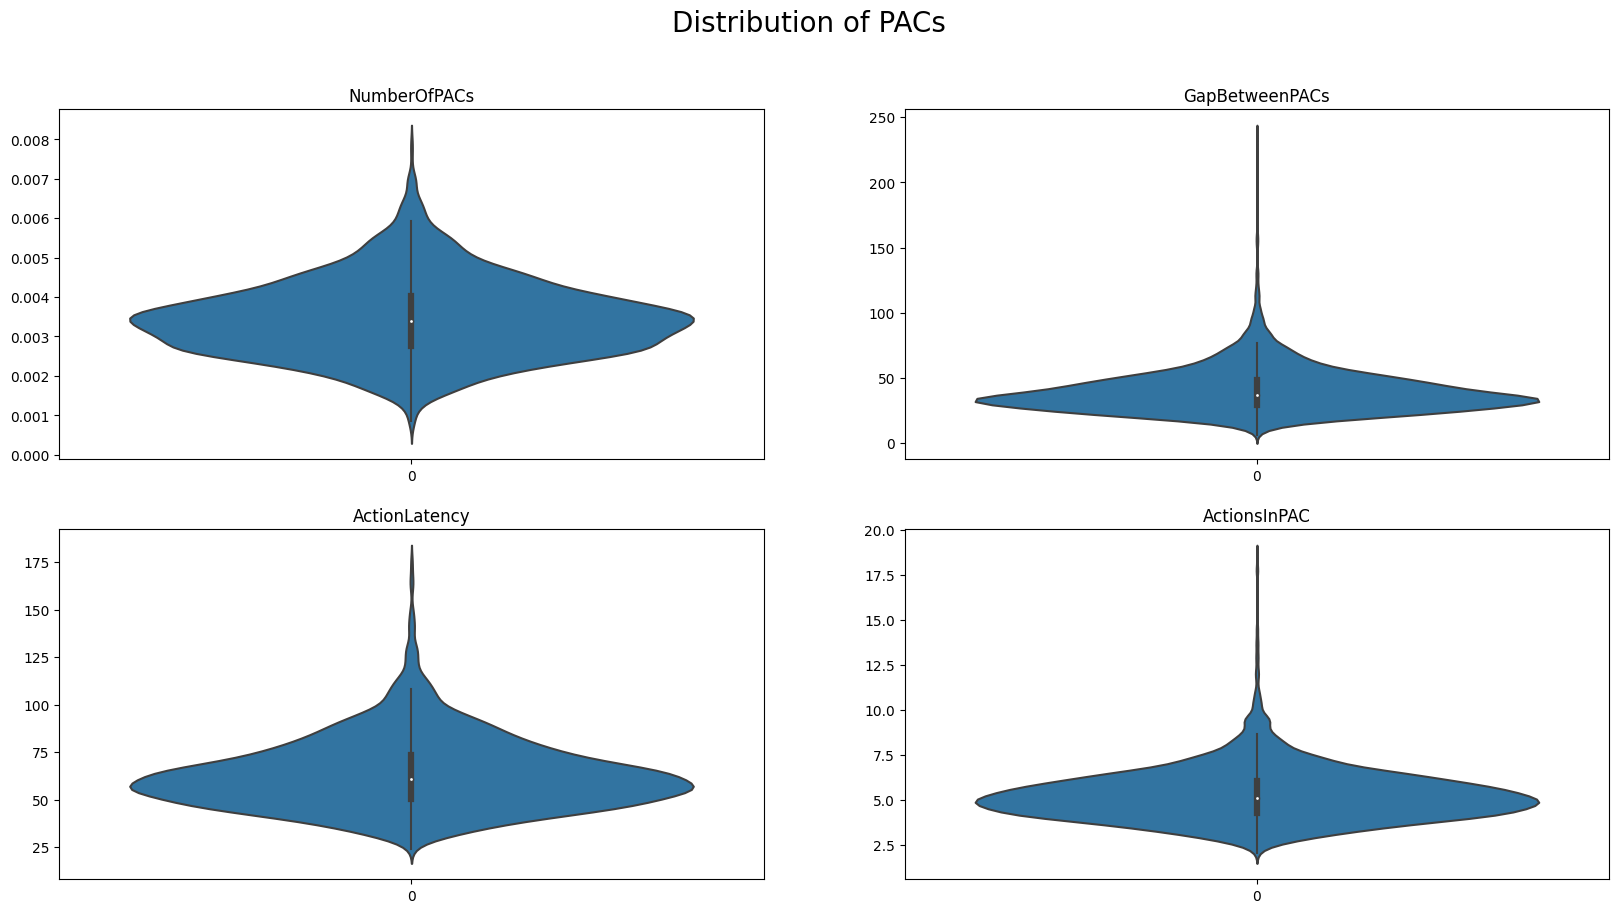

In [31]:
# distribution of PAC - Perception Action Cycle
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of PACs", fontsize=20)
sns.violinplot(data['NumberOfPACs'], ax = ax[0][0])
ax[0][0].set_title('NumberOfPACs')
sns.violinplot(data['GapBetweenPACs'], ax = ax[0][1])
ax[0][1].set_title('GapBetweenPACs')
sns.violinplot(data['ActionLatency'], ax = ax[1][0])
ax[1][0].set_title('ActionLatency')
sns.violinplot(data['ActionsInPAC'], ax = ax[1][1])
ax[1][1].set_title('ActionsInPAC')
plt.show()

<AxesSubplot:xlabel='ActionLatency', ylabel='LeagueIndex'>

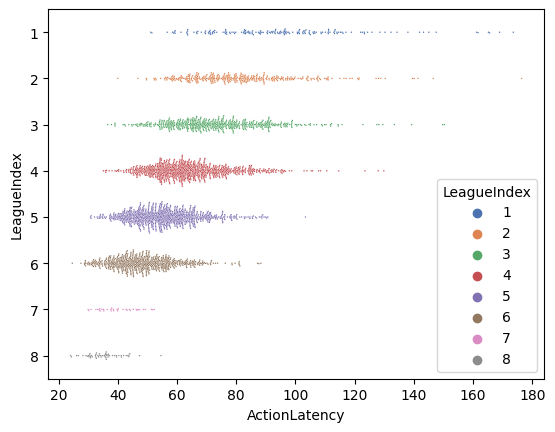

In [32]:
sns.swarmplot(data=data, x="ActionLatency", y="LeagueIndex", hue="LeagueIndex", palette="deep", orient="h", size=1)
plt.show()

ActionLatency also seems like a pretty important factor for LeagueIndex. Need to have a very low latency or fast reflexes to git gud at the game!

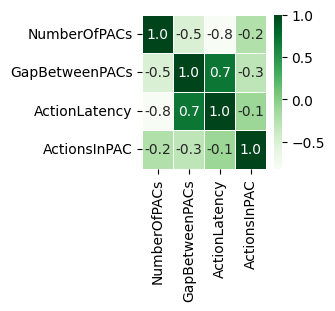

In [33]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['NumberOfPACs','GapBetweenPACs', 'ActionLatency', 'ActionsInPAC']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

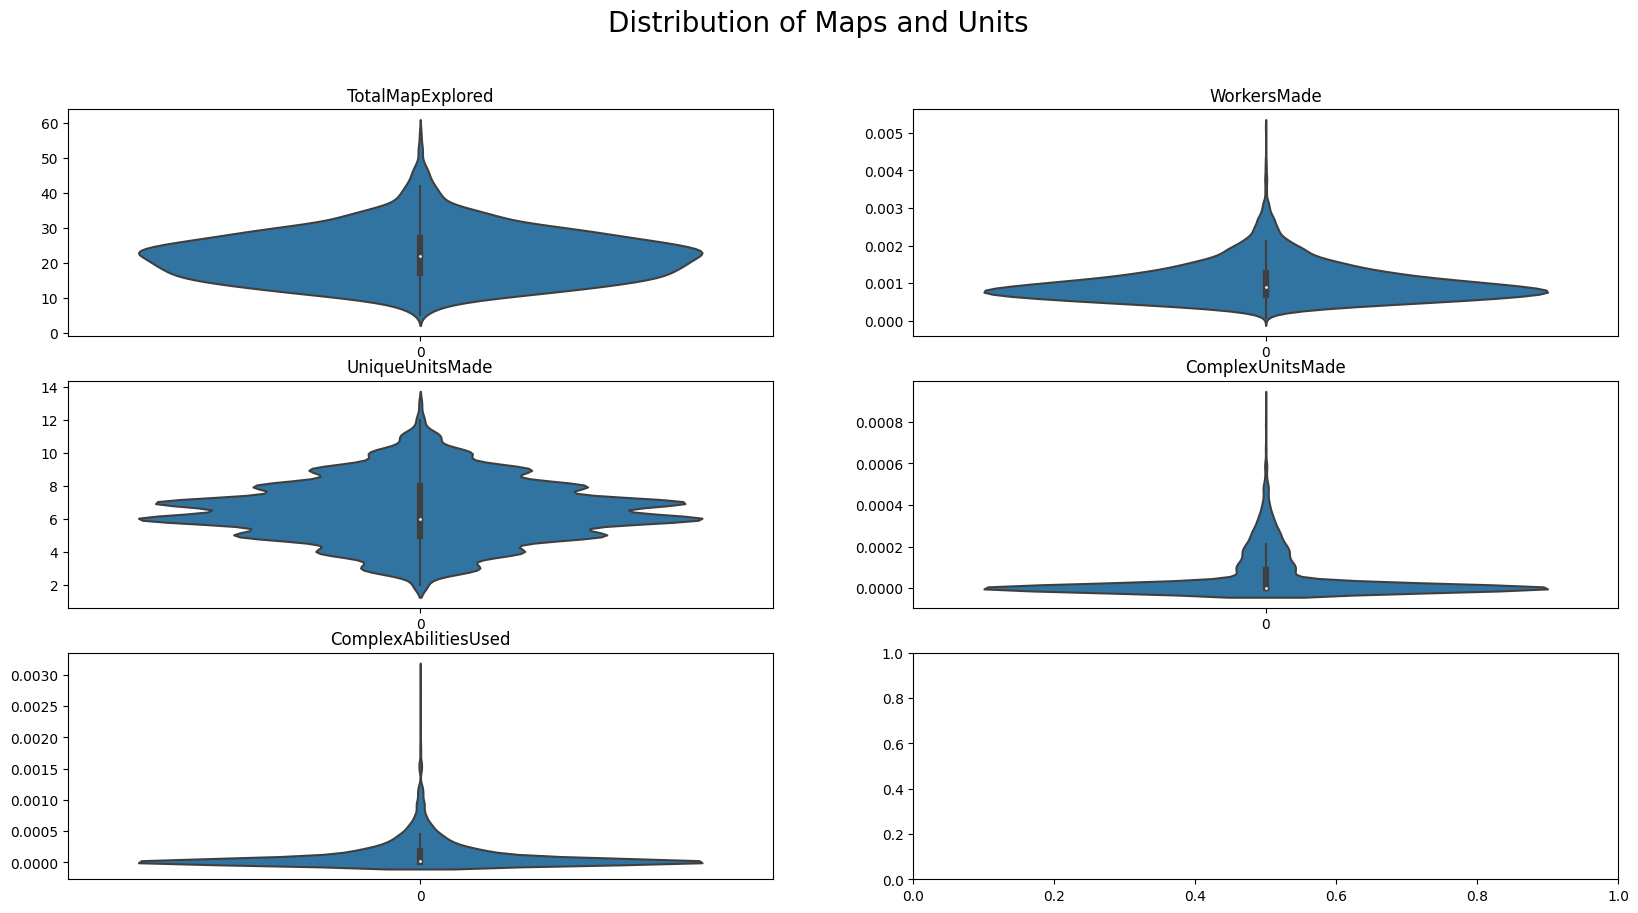

In [34]:
# distribution of map, and units
fig,ax = plt.subplots(3,2, figsize=(20,10))
plt.suptitle("Distribution of Maps and Units", fontsize=20)
sns.violinplot(data['TotalMapExplored'], ax = ax[0][0])
ax[0][0].set_title('TotalMapExplored')
sns.violinplot(data['WorkersMade'], ax = ax[0][1])
ax[0][1].set_title('WorkersMade')
sns.violinplot(data['UniqueUnitsMade'], ax = ax[1][0])
ax[1][0].set_title('UniqueUnitsMade')
sns.violinplot(data['ComplexUnitsMade'], ax = ax[1][1])
ax[1][1].set_title('ComplexUnitsMade')
sns.violinplot(data['ComplexAbilitiesUsed'], ax = ax[2][0])
ax[2][0].set_title('ComplexAbilitiesUsed')
plt.show()

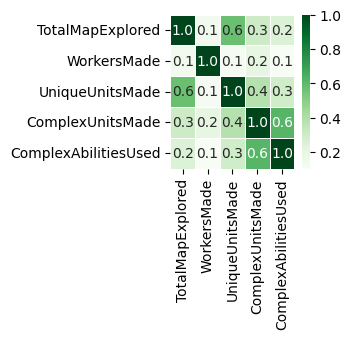

In [35]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['TotalMapExplored','WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Handling Outliers

Outliers can be handled in multiple ways:

1. Identify and Remove: One common approach is to identify outliers using statistical methods such as the Z-score or interquartile range (IQR), and then remove those data points from the dataset. However, this approach should be used with caution, as removing outliers may also remove valuable information from the dataset.

2. Transform: Instead of removing outliers, we can apply transformations to the data to reduce the impact of extreme values. For example, we can apply logarithmic, square root, or reciprocal transformations to make the data distribution more symmetric.

3. Winsorize: We can apply winsorization, which replaces outliers with values at a specific percentile, effectively limiting their influence on the analysis.

4. Binning: Another approach is to divide the data into bins or categories and treat the outliers separately. This can be useful when the presence of outliers significantly affects the analysis or when there is a clear distinction between outliers and the rest of the data. We can assign outliers to a separate bin or category to isolate their impact on the analysis.

5. Imputation: If outliers are present in missing data, we can use imputation techniques to estimate the missing values. Imputation methods, such as mean, median, or regression-based imputation, can help replace outliers with plausible values based on the rest of the dataset. However, it could significantly skew the imputed values.

6. Model-based Approaches: Some outlier detection algorithms, such as isolation forests or one-class SVM, use machine learning techniques to identify outliers based on the underlying patterns in the data. These models can be trained to classify observations as outliers or non-outliers, providing a more automated way of detecting and handling outliers.

Generally, for normally distributed data, we use Standard Deviation method and for other data distributions, we use the Interquartile range method.

Based on the above plots, we can classify the columns as:

1. Normally Distributed: 
APM, AssignToHotkeys, UniqueHotkeys, NumberOfPACs, GapBetweenPACs, ActionLatency, ActionsInPAC, TotalMapExplored


2. Other Distribution:
HoursPerWeek, SelectByHotkeys, MinimapAttacks, MinimapRightClicks, WorkersMade, ComplexUnitsMade, UniqueUnitsMade, ComplexAbilitiesUsed

There are some tests like Kolmogorov–Smirnov test and the Shapiro–Wilk test that check for normality of data. We can use those tests and classify their distibution and handle outliers accordingly, but for now we will just trust our violinplot distribution to check the normality of data.

In [36]:
def winsorize_outliers(df, column_name, k=1.5):
    """
    Function that inputs a dataframe and a column name (works with any data distribution), and detects outliers
    using IQR method and uses the winsorization method to impute them.
    """
    # Calculate the IQR
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr_value = iqr(df[column_name])

    # Define the outlier thresholds
    lower_threshold = q1 - k * iqr_value
    upper_threshold = q3 + k * iqr_value

    # Create a copy of the column for winsorization
    column_copy = df[column_name].copy()

    # Winsorize the outliers
    column_copy[column_copy < lower_threshold] = lower_threshold
    column_copy[column_copy > upper_threshold] = upper_threshold

    # Replace the original column with the winsorized values
    df[column_name] = column_copy

    return df

In [37]:
def winsorize_outliers_zscore(df, column_name, threshold=3):
    """
    Function that inputs a dataframe and a column name (preferable normally distributed), and detects outliers
    using Z-score and uses the winsorization method to impute them.
    """
    # Calculate the z-scores for the column
    z_scores = zscore(df[column_name])

    # Identify the outliers using the specified threshold
    outliers = np.abs(z_scores) > threshold

    # Create a copy of the column for winsorization
    column_copy = df[column_name].copy()

    # Winsorize the outliers
    column_copy[outliers] = np.sign(column_copy[outliers]) * threshold * np.std(column_copy) + np.mean(column_copy)

    # Replace the original column with the winsorized values
    df[column_name] = column_copy

    return df

In [38]:
normally_dist_cols = ['APM', 'AssignToHotkeys', 'UniqueHotkeys', 'NumberOfPACs', 'GapBetweenPACs',
                      'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',]
unnormal_dist_cols = ['HoursPerWeek', 'SelectByHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
                      'WorkersMade', 'ComplexUnitsMade', 'UniqueUnitsMade', 'ComplexAbilitiesUsed',]

In [39]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.647904,15.846244,952.691605,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,4.172119,11.874264,17172.196750,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [40]:
# normally distributed data - Standard Deviation method; other data distributions - Interquartile range method.
for col in normally_dist_cols:
    data = winsorize_outliers_zscore(data, col, threshold=4)
for col in unnormal_dist_cols:
    data = winsorize_outliers(data, col, k=1.5)

In [41]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.647904,15.212960,952.691605,116.947638,0.003668,0.000373,4.364654,0.000080,0.000364,0.003463,40.226072,63.672307,5.260570,22.126945,0.001011,6.533432,0.000048,0.000110
std,1.517327,4.172119,9.481941,17172.196750,51.507667,0.003225,0.000221,2.360333,0.000094,0.000294,0.000991,16.355792,18.925571,1.425182,7.411473,0.000453,1.855724,0.000078,0.000152
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,38.000000,1000000.000000,324.797508,0.010945,0.001273,10.000000,0.000297,0.001075,0.007431,108.965738,140.683544,11.251450,51.854162,0.002122,12.500000,0.000214,0.000453


## Model Training

### SMOTE (Synthetic Minority Over-sampling Technique)
As I promised in the earlier section, we will handle the class imbalance using SMOTE.

SMOTE is a popular technique used for handling imbalanced datasets. It addresses the issue of imbalanced class distribution by generating synthetic examples of the minority class to balance the dataset. SMOTE works by creating synthetic samples in the feature space of the minority class by interpolating between existing minority class samples.

Here's how SMOTE works in a nutshell:

1. Identify the minority class: Determine the class in the dataset that is less represented and considered the minority class.

2. Select a minority class sample: Randomly choose a sample from the minority class.

3. Find its k nearest neighbors: Measure the distances between the chosen sample and its k nearest neighbors. The value of k is a user-defined parameter.

4. Generate synthetic samples: Randomly select one of the k nearest neighbors and interpolate between the chosen sample and the selected neighbor to create a new synthetic sample. Repeat this process to generate the desired number of synthetic samples.

5. Repeat the process: Repeat steps 2-4 until the desired balance between the minority and majority class is achieved.

By creating synthetic samples, SMOTE helps to increase the representation of the minority class, which can improve the model's ability to learn and generalize patterns from the data.

In [42]:
import imblearn
from imblearn.over_sampling import SMOTE

In [43]:
X = data.drop(['LeagueIndex'], axis=1)
y = data['LeagueIndex']

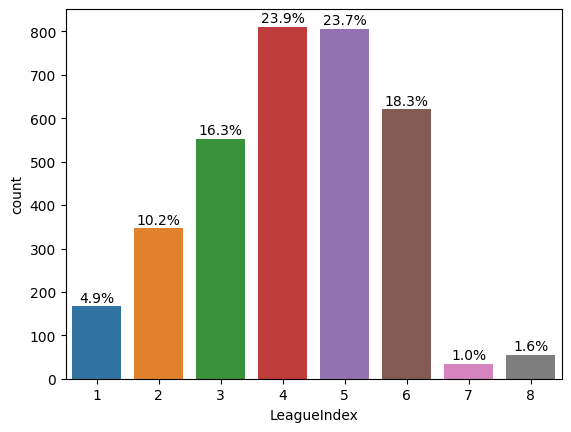

In [44]:
# distribution of the target variable to check if it is skewed or balanced
ax = sns.countplot(x='LeagueIndex', data=data)
for i, patch in enumerate(ax.patches):
    percentage = 100 * patch.get_height()/len(data)
    x_ = patch.get_x() + patch.get_width()/2
    y_ = patch.get_height()+10
    ax.annotate('{:.1f}%'.format(percentage), (x_, y_), ha='center')
plt.show()

In [45]:
smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

In [46]:
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                            pd.Series(y_resampled, name='LeagueIndex')], axis=1)

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

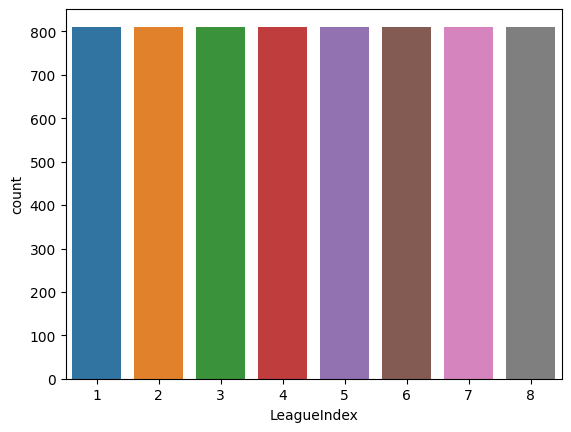

In [47]:
sns.countplot(x='LeagueIndex', data=resampled_data)
plt.show()

Now the target variable distribution seems balanced across all classes, now we can proceed to training the model.

## Pycaret - Automate some of the classification model fitting tasks

In [48]:
from pycaret.classification import *
s = setup(resampled_data, target = 'LeagueIndex', session_id = 42)

,Description,Value
0,Session id,42
1,Target,LeagueIndex
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7"
4,Original data shape,"(6488, 19)"
5,Transformed data shape,"(6488, 19)"
6,Transformed train set shape,"(4541, 19)"
7,Transformed test set shape,"(1947, 19)"
8,Numeric features,18
9,Preprocess,True


In [49]:
# fit diff models on the data
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7018,0.9388,0.7018,0.6891,0.6924,0.6592,0.6603,0.9390
rf,Random Forest Classifier,0.6844,0.9339,0.6844,0.6719,0.6756,0.6393,0.6402,1.1120
lightgbm,Light Gradient Boosting Machine,0.6818,0.9330,0.6818,0.6770,0.6776,0.6363,0.6369,1.2800
xgboost,Extreme Gradient Boosting,0.6776,0.9308,0.6776,0.6726,0.6735,0.6315,0.6321,2.6140
gbc,Gradient Boosting Classifier,0.6276,0.9167,0.6276,0.6187,0.6214,0.5744,0.5750,3.6930
knn,K Neighbors Classifier,0.5952,0.8565,0.5952,0.5710,0.5766,0.5374,0.5395,1.0740
dt,Decision Tree Classifier,0.5840,0.7623,0.5840,0.5798,0.5806,0.5246,0.5250,0.7740
nb,Naive Bayes,0.5067,0.8697,0.5067,0.4964,0.4886,0.4363,0.4405,0.7540
lda,Linear Discriminant Analysis,0.4893,0.8711,0.4893,0.4944,0.4892,0.4164,0.4170,0.7460
lr,Logistic Regression,0.4891,0.8743,0.4891,0.4798,0.4823,0.4161,0.4167,1.9200


In [50]:
# view best model params
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)


In [51]:
# visualize performance of the model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

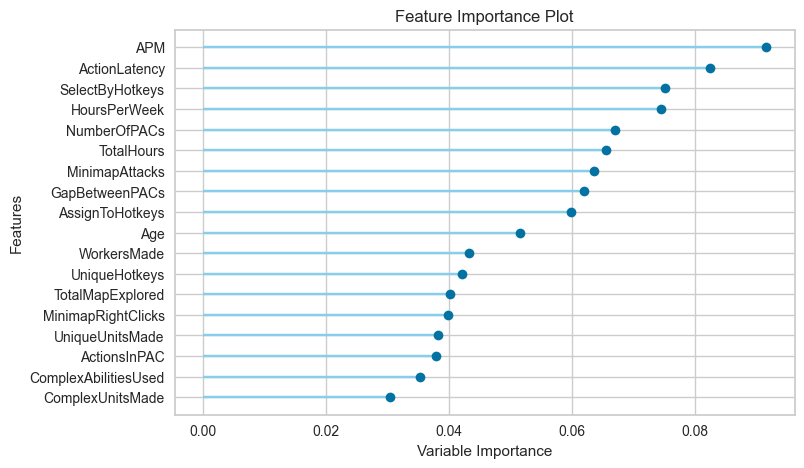

In [52]:
# feature importance curve
plot_model(best, plot = 'feature_all')

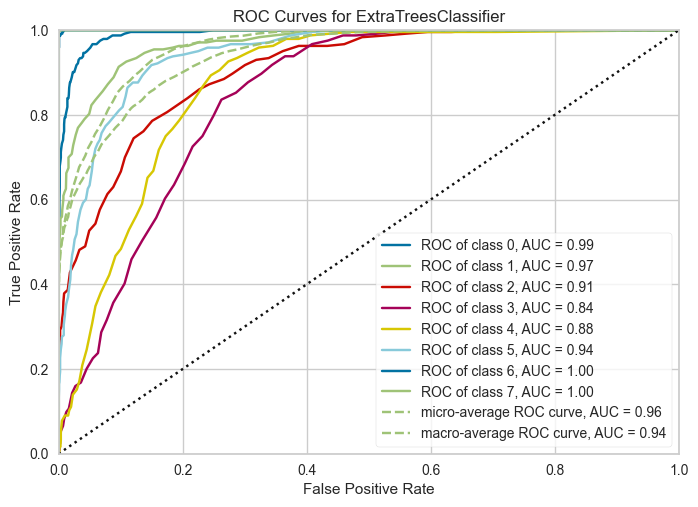

In [53]:
# auc curve
plot_model(best, plot = 'auc')

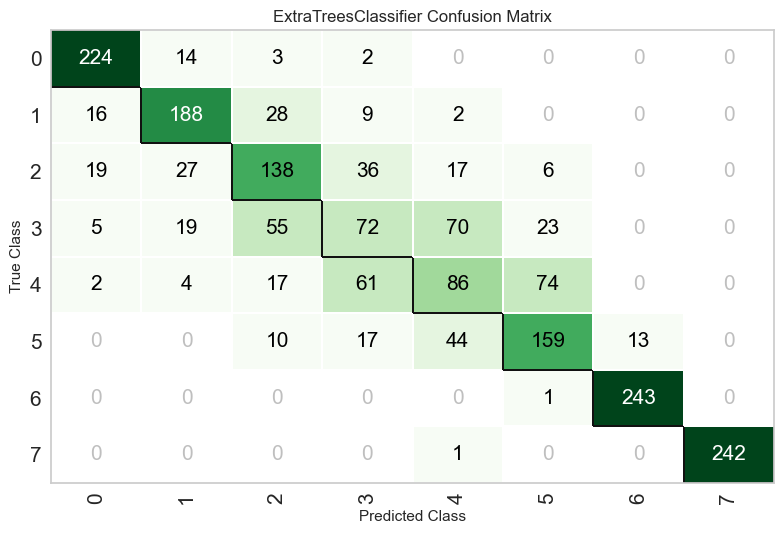

In [54]:
# confusion matrix for the classification
plot_model(best, plot = 'confusion_matrix')

In [55]:
# make predictions using the model along with confidence score
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6944,0.9415,0.6944,0.6808,0.6866,0.6508,0.6511


,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,...,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex,prediction_label,prediction_score
5366,24.075802,20,1000,212.260452,0.005947,0.001261,7,0.000297,0.000247,0.004558,...,34.935108,7.216024,29.469383,0.000532,3.075802,0.000000,0.000186,6,7,1.00
463,19.000000,10,200,133.910995,0.004849,0.000351,1,0.000000,0.000736,0.003482,...,56.711399,6.073800,28.000000,0.001332,7.000000,0.000082,0.000093,3,3,0.34
1859,21.000000,12,200,62.004002,0.001691,0.000302,5,0.000000,0.000157,0.002900,...,85.766701,3.558300,14.000000,0.000604,7.000000,0.000000,0.000193,0,2,0.31
3929,19.602289,9,20,48.781727,0.001886,0.000454,1,0.000091,0.000342,0.002530,...,99.775177,3.031810,12.994277,0.000524,7.000000,0.000000,0.000106,0,1,0.77
4983,23.000000,38,2451,175.839615,0.008737,0.000848,8,0.000087,0.000290,0.005831,...,37.550190,4.071598,34.023315,0.001217,10.511657,0.000162,0.000453,6,7,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,19.898554,25,546,150.810791,0.005528,0.000238,5,0.000129,0.000211,0.003866,...,52.506283,5.937831,23.391325,0.000889,5.797108,0.000000,0.000003,5,6,0.78
279,17.000000,20,500,61.888199,0.001603,0.000190,5,0.000112,0.000086,0.002421,...,91.103203,4.220600,23.000000,0.000741,7.000000,0.000000,0.000000,3,2,0.43
4651,18.886681,19,747,98.468765,0.000604,0.000122,2,0.000027,0.000965,0.003311,...,65.359039,5.422235,24.679918,0.001146,6.886681,0.000000,0.000000,2,3,0.87
2930,20.000000,10,200,68.139000,0.001621,0.000101,4,0.000000,0.000025,0.004072,...,65.209900,2.722200,24.000000,0.000779,6.000000,0.000101,0.000088,2,3,0.24


In [56]:
# save the best model pipeline pkl file
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\shrea\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'HoursPerWeek',
                                              'TotalHours', 'APM',
                                              'SelectByHotkeys',
                                              'AssignToHotkeys', 'UniqueHotkeys',
                                              'Minimap...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None

In [57]:
1/0

ZeroDivisionError: division by zero

## Hyperparameter Tuning the best model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

X = resampled_data.drop(['LeagueIndex'], axis=1)
y = resampled_data['LeagueIndex'] # 1-8

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2],
    'max_features': ['auto']
}
# param_grid = {
#     'n_estimators': [100, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

model = ExtraTreesClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

### Neural Net

Playing around with neural net to see how it compares to our statistical models, and if it is able to reach to a comparable accuracy in a small dataset!

In [ ]:
# Spliting target variable and independent variables
X = resampled_data.drop(['LeagueIndex'], axis=1)
y = resampled_data['LeagueIndex'] # 1-8
# Label encoding target variable to make it 0-7
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify=y)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Creating the architecture of the ANN
class NeuralNet(nn.Module):
    def __init__(self, input_features=18, hidden_dim=[40, 20, 10], output_features=8,
                 dropout_prob=0.5, activation='relu', use_normalization=False):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_features
        
        if use_normalization:
            layers.append(nn.BatchNorm1d(input_features))
        
        for hidden_dim in hidden_dim:
            layers.append(nn.Linear(in_features, hidden_dim))
            
            if use_normalization:
                layers.append(nn.BatchNorm1d(hidden_dim))
            
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            
            layers.append(nn.Dropout(p=dropout_prob))
            in_features = hidden_dim
        
        layers.append(nn.Linear(in_features, output_features))
        layers.append(nn.Softmax())
        
        def init_weights(m):
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform(m.weight)
                m.bias.data.fill_(0.01)
        
        self.model = nn.Sequential(*layers)
        self.model.apply(init_weights)
        
    def forward(self, x):
        return self.model(x)

In [ ]:
# Instantiate the model
torch.manual_seed(42)
model = NeuralNet(input_features=X_train.shape[1])
model.parameters

In [ ]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
epochs = 1000
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())
    if(i%100==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Loss function
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Predicting on test data
y_pred = []
with torch.no_grad():
    for i, (test_data, actual) in enumerate(zip(X_test, y_test)):
        pred = model(test_data)
        predict = pred.argmax().item()
        y_pred.append(predict)

In [ ]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted).T
    sns.heatmap(cm, annot=True )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc_nn = round( metrics.accuracy_score(y_test.tolist(), y_pred) * 100 , 2 )
print( 'Neural Net Accuracy : ', acc_nn )
draw_cm(y_test.tolist(), y_pred)

Accuracy is not as great as statistical models since the dataset size is pretty small. If we had large amount of data, then the neural net would have worked better, and even surpassed the accuracy of the statistical models.